INFO6105 Instructor: Dr. Handan Liu

Homework 5

Grading: total 100 points


1. Parameter tuning (total 32 points)
Goal: Select the best tuning parameters (aka "hyperparameters") for KNN (K nearest neighbors) on the iris dataset
(0) read in the iris dataset: iris = load_iris()
(1) create X (features) and y (response) [4pts]
(2) 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter), scoring is 'accuracy' [8pts]
(3) use average accuracy as an estimate of out-of-sample accuracy [4pts]
(4) search for an optimal value of K for KNN [10pts]
(5) plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis) [6pts]

In [13]:
# Required Packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets # for importing Iris dataset
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
# import iris data 
iris = datasets.load_iris()

In [15]:
# Feature in X, Response in y
X = iris.data
y = iris.target

In [16]:
# split X, y into Train, Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [17]:
# Train on KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
# 10 fold croos validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv = 10, scoring = 'accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [19]:
# average accuracy as an estimate of out-of-sample accuracy
avg = scores.mean()
print(avg)

0.9666666666666668


In [20]:
# search for an optimal value of K for KNN
k_range = range(1, 40)
k_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(classifier, X, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

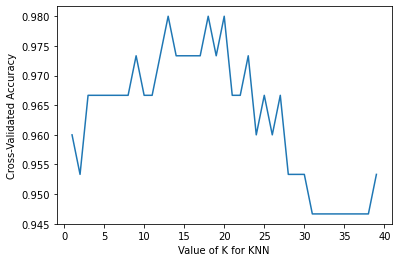

In [21]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis) 
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Result: As we know, the model found in the middle is best because it appropriately balances bias and variance therefore it is most likely to generalize to out-of-sample data. 
Thus, on seeing above plot, the value of parameter k can be taken 20, as higher values of k produce lower complexity models.

2. Model selection (total 12 points)
Goal: Compare the best KNN model with logistic regression on the iris dataset
(1) 10-fold cross-validation with the best KNN model, scoring is 'accuracy' [6pts]
(2) 10-fold cross-validation with logistic regression, scoring is 'accuracy' [6pts]

In [22]:
# 10-fold cross-validation with the best KNN model
knn_classifier = KNeighborsClassifier(n_neighbors = 20)
knn_classifier.fit(X_train, y_train)
knn_score = cross_val_score(knn_classifier, X, y, cv = 10, scoring = 'accuracy').mean()
print("Accuracy of KNN:" ,knn_score)

Accuracy of KNN: 0.9800000000000001


In [23]:
# 10-fold cross-validation with logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression( max_iter = 1000)
lr_classifier.fit(X_train, y_train)
lr_score = cross_val_score(lr_classifier, X, y, cv = 10, scoring = 'accuracy').mean()
print("Accuracy of LR:", lr_score)

Accuracy of LR: 0.9733333333333334


Result: Comparing both the model's accuracy, it can be seen that KNN (k = 20) is the best choice of model.

3. Feature selection (total 36 points)
Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset
(0) read in the advertising dataset
(1) create a Python list of three feature names: TV, radio, newpaper (5 points)
(2) use the list to select a subset of the DataFrame (X) (5 points)
(3) select the sales column as the response (y) (5 points)
(4) 10-fold cross-validation with all three features, scoring is 'neg_mean_squared_error' (6 points) 
(5) fix the sign of MSE scores (5 points)
(6) convert from MSE to RMSE (5 points)
(7) calculate the average RMSE (5 points)
(8) 10-fold cross-validation with two features (excluding Newspaper), scoring is'neg_mean_squared_error' (10)

In [24]:
# read in the advertising dataset
dataset = pd.read_csv("Advertising.csv")
print(dataset)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [25]:
# create a Python list of three feature names: TV, radio, newpaper
features_list = ['TV', 'Radio', 'Newspaper']

In [26]:
# use the list to select a subset of the DataFrame (X) 
X = dataset[features_list]

In [27]:
# select the sales column as the response (y) 
y = dataset.Sales

In [28]:
# 10-fold cross-validation with all three features, scoring is 'neg_mean_squared_error' 
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression()
scores = cross_val_score(lr_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [29]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [30]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [31]:
# calculate the average RMSE 
rmse_avg = rmse_scores.mean()
print(rmse_avg)

1.6913531708051792


In [32]:
#  10-fold cross-validation with two features (excluding Newspaper), scoring is'neg_mean_squared_error'
features_list_2 = ['TV', 'Radio']

In [33]:
X = dataset[features_list_2]
y = dataset.Sales
lr_regressor = LinearRegression()
scores_2 = cross_val_score(lr_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
mse_scores_2 = -scores_2
rmse_scores_2 = np.sqrt(mse_scores_2)
rmse_avg_2 = rmse_scores_2.mean()
print(rmse_avg_2)

1.6796748419090766


4. Contruct a decision tree (total 20 points)
(1) After loading Breast Cancer dataset, print the target names (target_names) and feature names (feature_names). [4 pts] 
(2) Split the dataset into 2 parts: half for traning and another half for testing [2pts], and instantiate the decision tree model (setting max_depth=4) [2pts] to get the accuracy score for testing data[2pts]. [6 pts]
(2) Drawing a decision tree using graphviz with the parameters as: 'class_names' is set as malignant and benign, 'feature_names' is set as the feature names, 'impurity' is False and 'filled' is True; output the tree as a file. [5pts] 
    read in this file and visualize this tree graph. [5pts]

In [34]:
# import Breast Cancer dataset
dataset = datasets.load_breast_cancer()

In [35]:
# print the target names
print(dataset.target_names)

['malignant' 'benign']


In [36]:
# print the features names
print(dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [37]:
# Feature in X, Response in y
X = dataset.data
y = dataset.target

In [38]:
# split X, y into Train, Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

In [39]:
# Train on Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth = 4)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
# predict y
y_pred= dt_classifier.predict(X_test)

In [41]:
# confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", dt_accuracy)

[[ 94   9]
 [ 19 163]]
Accuracy :  0.9017543859649123


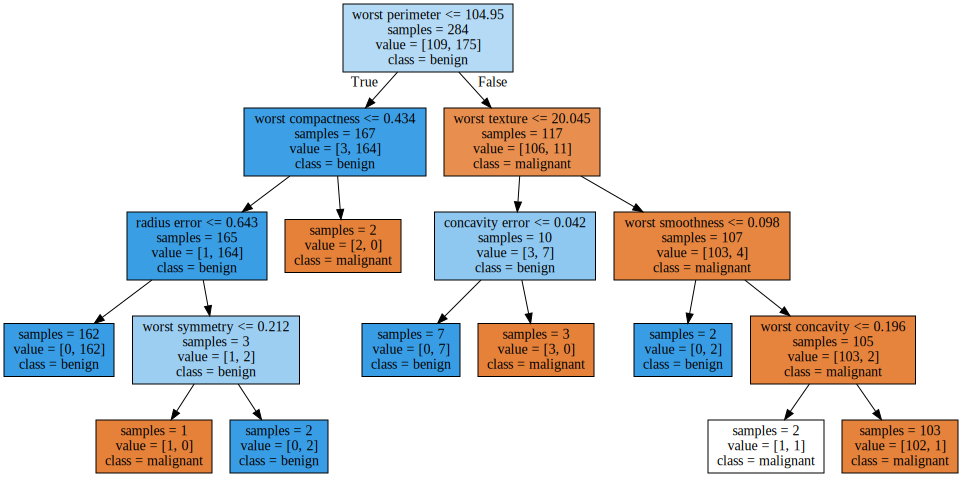

In [42]:
# visualize tree graph
from sklearn.tree import export_graphviz
export_graphviz(dt_classifier, out_file = "file.dot", class_names = ['malignant',"benign"],
                feature_names = dataset.feature_names, impurity = False, filled = True)
import graphviz
with open("file.dot") as dt:
    dot_graph=dt.read()
graphviz.Source(dot_graph)